In [3]:
import numpy as np
from pandas_dq import dq_report
import pandas as pd
import seaborn as sns
from summarytools import dfSummary, tabset


pd.set_option("display.max_columns", 10)
pd.set_option("display.max_rows", 10)

In [4]:
housePrices = pd.read_csv("csv_files/housePricesTrain.csv")
housePrices = housePrices.drop(columns=["Id"])

As seen bellow, our train dataset contains 1460 lines and 80 columns/features. 

In [5]:
housePrices.shape

(1460, 80)

In [12]:
pd.set_option("display.max_columns", None)

housePrices.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


A quick analysis using dq_report will allow us to better understand our dataset. 

In [6]:
X_analysis = dq_report(housePrices, verbose=2)

/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_16055/2887496668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_analysis = dq_report(housePrices, verbose=2)


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
MSSubClass,int64,0.000000,1,20,190,has 103 outliers greater than upper bound (145.0) or lower than lower bound(-55.0). Cap them or remove them.
MSZoning,object,0.000000,0,C (all),RM,"3 rare categories: ['FV', 'RH', 'C (all)']. Group them into a single category or drop the categories."
LotFrontage,float64,17.739726,NA,21.000000,313.000000,"259 missing values. Impute them with mean, median, mode, or a constant value such as 123., has 88 outliers greater than upper bound (111.5) or lower than lower bound(27.5). Cap them or remove them."
LotArea,int64,0.000000,73,1300,215245,has 69 outliers greater than upper bound (17673.5) or lower than lower bound(1481.5). Cap them or remove them.
Street,object,0.000000,0,Grvl,Pave,1 rare categories: ['Grvl']. Group them into a single category or drop the categories.
Alley,object,93.767123,0,nan,nan,"1369 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: float, object,"
LotShape,object,0.000000,0,IR1,Reg,"2 rare categories: ['IR2', 'IR3']. Group them into a single category or drop the categories."
LandContour,object,0.000000,0,Bnk,Lvl,"3 rare categories: ['Bnk', 'HLS', 'Low']. Group them into a single category or drop the categories."
Utilities,object,0.000000,0,AllPub,NoSeWa,1 rare categories: ['NoSeWa']. Group them into a single category or drop the categories.
LotConfig,object,0.000000,0,Corner,Inside,"2 rare categories: ['FR2', 'FR3']. Group them into a single category or drop the categories."


A look at the data dictonary for this dataset will show us that all the NaN's above are actually meaninful entries that have been missclassified. They will be kept, but when preparing the data, we will be filling these values, either with 0s or 'None'.

#### Target analysis

<AxesSubplot: >

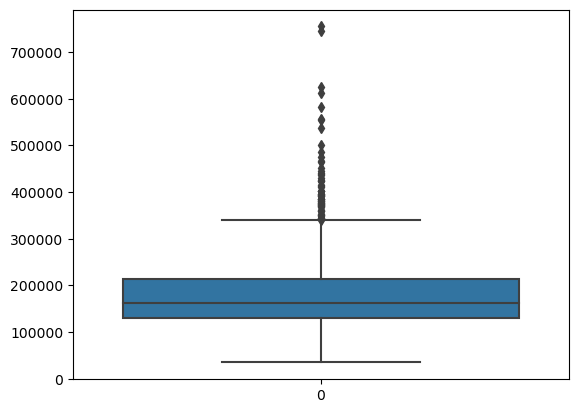

In [7]:
sns.boxplot(housePrices["SalePrice"])

/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_16055/2824040640.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(housePrices['SalePrice']))


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

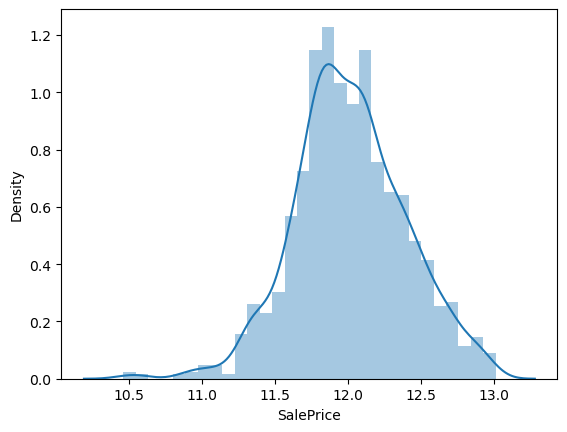

In [15]:
sns.distplot(np.log(housePrices["SalePrice"]))

There is a fair amount of outliers. Our plan later is to use tree models, and they should be robust to outliers. Still, I will be capping this dataset to remove the more extreme values (>450000)

In [8]:
housePrices = housePrices[housePrices["SalePrice"] <= 450000]

Not many entries will be lost.

In [9]:
housePrices.shape

(1446, 80)

#### Rare categories

In [10]:
dfSummary(housePrices)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,MSSubClass[int64],Mean (sd) : 57.0 (42.4)min < med < max:20.0 < 50.0 < 190.0IQR (CV) : 50.0 (1.3),15 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACjUlEQVR4nO3cT27aQBiG8W8KRAYkI4QEOy5QqQuWHKKH7RG64ATcgB0SQka4sTBjd9EmitSIPzO44SXPb40NUR7FHxN7XF3XBty7Lx/9AYBLtM+9wDnXNbOnwPMf6rp+DjwWeHUyVOdcdzQafU/TdBhy8t1ut3XO/SBWxDr3F/UpTdPhfD5/HgwGxTUnzrIsWSwWw81m82RmhIooZy/9ZmaDwaAYj8e/As7fDTgG+AdfpiCBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCHhog0oPgr7XuHF3YbKvld4625DNfa9whv3HKqZse8V/uDLFCQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQ0eoe/975jZqlzLuTwtKqqzo0/EkQ1Fmqe552yLL9Np9NWq9W66pknM7OyLBPv/deiKH6aWcijKHggjYV6OBzaSZL0ZrNZMZlMttcev1qthsvlsnc8HltNfD5oafzhvn6/H/Rw3na75eE8vOLLFCQQKiQQKiQQKiTc/U4poSLXcM0iNlljc7fbe8hQY9dwzcI3WWNzt2Y8ZKixa7iRm6yxuVsDHjLUF6FruH9FreMqbu4WObKYNTi2PHSoMSJmXMl7FGJHFrNmxxZCfUfMjCt8j0LwyGLW/NhCqO+ImXHV71GIGFnMe59a+ErLybGBUE8ImXE/6z0KsSst58YGQsVNxFyFLhkbCBU3FbHScvJKdFGoWZYl177rfr9PzMzyPE/W63Xvfx6v+t5ZliXe+7bF/UctVFpVVTvkd20W/3Ofe81vDP1kRDRCefkAAAAASUVORK5CYII="">",0(0.0%)
2,MSZoning[object],1. RL2. RM3. FV4. RH5. C (all),"1,138 (78.7%)217 (15.0%)65 (4.5%)16 (1.1%)10 (0.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACYklEQVR4nO3dwW3iUBiF0R+EMsPGCCFRBgVQRIqdIiiAPhDCiyGTDbOYJJpNkg3vPis5p4In5ZMdW75idrvdChLmvQ/A9yE2YsRGzKyqllX10PsgNPd8u92uPQ+w2Gw2j8MwrHsegvbGcTzPZrNfPYNbDMOw3u/319Vq9dTrELR1uVx+Hg6H9el0eqiqfrFVVa1Wq6ftdvu71yGIWPY+gAcEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNmUfXvE5TeB6Gdqfx9F+M4ng+Hw7om8AkK7YzjeK6q555n8Fn499H9s/CZ3SgpHhCIaX0b7X7pZjqarqumsOhhOpqtq6ay6GE6Wq+rvE7hjQcEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiOm2bpqKosepqPpumoKix6mw2fhxFhXEeMBgZjPbqNug9zNh+sq6yju6d11lXUU9/bZuso6irvxgECM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxLy7rrKO4t4+XFdZR3FPPgsnxrqKmP+vbK5iNPU2eDFuobX5MAzr3W5XLwsrvztKM/OqquVy+af3Qfj6vNQlRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERsy8qup6vf7ofRC+vvk4jufj8WhJRXM2CMRYVxHzemUrVzVaW2w2m8eqKssqWpsPw7C2rCLBezZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERs3hZVVVZVtGYDQIx1lXE+J+NGLER8xdes98vRiWzhgAAAABJRU5ErkJggg=="">",0(0.0%)
3,LotFrontage[float64],Mean (sd) : 69.7 (24.1)min < med < max:21.0 < 69.0 < 313.0IQR (CV) : 21.0 (2.9),109 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACQklEQVR4nO3dMY7aUBRG4fviARlQbCEk6NhApBSULGIWmzZdClbADmgQEjJGOONgjKeaKkoG/HDi33O+/nksdMRgJO51VVUZ0Haf/vcNALd4avLizrmBmfU9LnGuqurlUfcDXY2F6pwbTCaT5yiKxnWvcTweE+fcN2JFk++o/SiKxsvl8iWO4/zew2mahqvVarzf7/tmRqgfXKP/+s3M4jjOp9Ppz5rHBw+9GcjiYQoSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSGp847aMsy56ZRc65OsdZVNEhrQ01y7JeURRf5/N5EATB3TsAWFTRLa0N9Xw+P4VhOFwsFvlsNkvuOcuiiu5pbahvRqNR3WUVLKroEB6mIIFQIYFQIYFQIYFQIeHdp36PDdHR9Xrt1TgH/OavofpsiC6KIizL8kue5z/MrO4uVMDM3n9Hrb0herPZjNfr9fByuQQe9weY2Y1f+NfZEJ0kCV+442F4mIIEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoWE1v9cui7PKStmTFpplU6G6jtlxYxJK23TyVB9pqyYMWmljToZ6huPKStWlmVkDGhrjZtCTdM0vPfCp9MpNDPLsizc7XbDf3ne929vt9vPPh8dDofDyTn33cxqfez4oH5VVfXH1+sVB8LHqHRyfnsAAAAASUVORK5CYII="">",258(17.8%)
4,LotArea[int64],Mean (sd) : 10426.8 (9927.3)min < med < max:1300.0 < 9434.5 < 215245.0IQR (CV) : 3994.5 (1.1),"1,061 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABk0lEQVR4nO3XwWoaUQCF4XtrKnHRGURw6SP0AXyIPGy23fssbqS

house